# Wczytanie danych

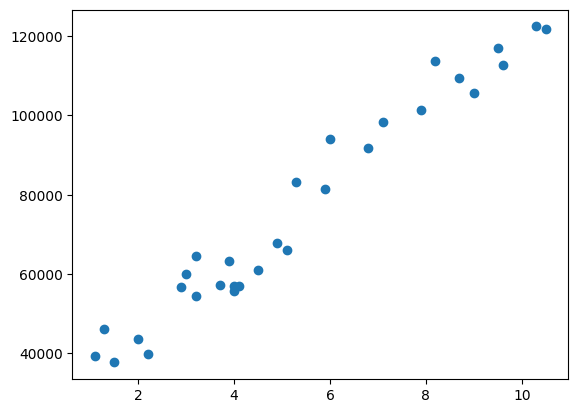

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

salary = pd.read_csv('data/salary.csv')

plt.scatter(salary['YearsExperience'], salary['Salary'])

# Regresja prosta

In [4]:
from sklearn.linear_model import LinearRegression

y = salary["Salary"]
x = salary.drop(columns=["Salary"])

model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [6]:
model.coef_

array([9449.96232146])

Współczynnik kierunkowy = 9450 dolarów. Wzrost liczby lat doświadczenia o 1 rok wiąże się ze średnim wzrostem zarobków o 9450 dolarów.

In [7]:
model.intercept_

np.float64(25792.20019866871)

Wyraz wolny = 25792 dolarów. Osoba bez doświadczenia zarabia średnio 25792 dolarów.

wynagrodzenie = 9450 * doświadczenie + 25792

## Ocena jakości modelu

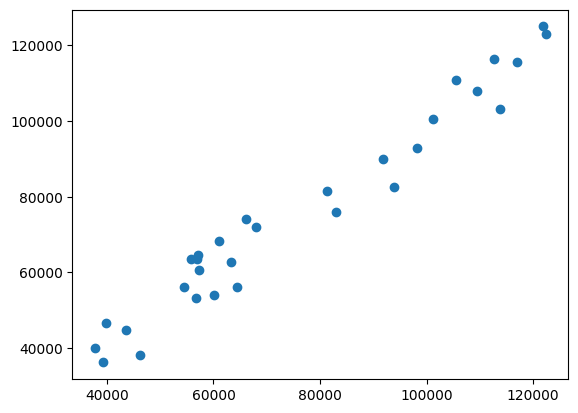

In [9]:
y_pred = model.predict(x)

plt.scatter(y, y_pred)

In [14]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

print("R2:", r2_score(y, y_pred))
print("MSE:", mean_squared_error(y, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))
print("MAE:", mean_absolute_error(y, y_pred))

R2: 0.9569566641435086
MSE: 31270951.722280968
RMSE: 5592.043608760662
MAE: 4644.2012894435375


Współczynnik R2 wynosi 0,96 (96%), co oznacza, że model wyjaśnia 96% zmienności wynagrodzenia.

RMSE = 5592 dolarów, co oznacza, że średni błąd modelu wynosi 5592 dolarów.

MAE = 4644 dolarów, co oznacza, że średni absolutny błąd modelu wynosi 4644 dolarów.

In [ ]:
! pip install statsmodels

In [17]:
import statsmodels.api as sm

x_const = sm.add_constant(x)
model_sm = sm.OLS(y, x_const).fit()

print(model_sm.summary())

                             OLS Regression Results                            
Dep. Variable:                  Salary   R-squared:                       0.957
Model:                             OLS   Adj. R-squared:                  0.955
Method:                  Least Squares   F-statistic:                     622.5
Date:              niedz., 01 cze 2025   Prob (F-statistic):           1.14e-20
Time:                         09:44:36   Log-Likelihood:                -301.44
No. Observations:                   30   AIC:                             606.9
Df Residuals:                       28   BIC:                             609.7
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.579e+04   227

## Zadanie

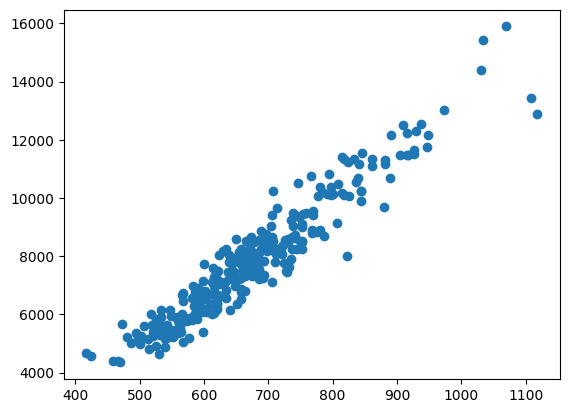

In [32]:
sklep = pd.read_csv("data/sklep77.csv")
sklep = sklep[sklep['czy_otwarty']=="Tak"]

plt.scatter(sklep['liczba_klientow'], sklep['sprzedaz'])

In [23]:
x_sklep = sklep[['liczba_klientow']]
y_sklep = sklep['sprzedaz']

model_sklep = LinearRegression()
model_sklep.fit(x_sklep, y_sklep)
y_sklep_pred = model_sklep.predict(x_sklep)


In [25]:
print(model_sklep.coef_)
print(model_sklep.intercept_)

[16.34367732]
-3215.884344170354


sprzedaz = 16 * liczba_klientow - 3216

In [30]:
from sklearn.metrics import mean_absolute_percentage_error

print(r2_score(y_sklep, y_sklep_pred))
print(mean_absolute_error(y_sklep, y_sklep_pred))
print(np.sqrt(mean_squared_error(y_sklep, y_sklep_pred)))
print(mean_absolute_percentage_error(y_sklep, y_sklep_pred))

0.9122611196393579
467.26704462200655
604.5778488521806
0.06111849300672005


In [27]:
x_new = pd.DataFrame({'liczba_klientow': [300, 700, 1050]})
model_sklep.predict(x_new)

array([ 1687.21885216,  8224.68978061, 13944.976843  ])

In [28]:
x_sklep_const = sm.add_constant(x_sklep)
model_sklep_sm = sm.OLS(y_sklep, x_sklep_const).fit()
print(model_sklep_sm.summary())

                             OLS Regression Results                            
Dep. Variable:                sprzedaz   R-squared:                       0.912
Model:                             OLS   Adj. R-squared:                  0.912
Method:                  Least Squares   F-statistic:                     3130.
Date:              niedz., 01 cze 2025   Prob (F-statistic):          4.29e-161
Time:                         10:10:16   Log-Likelihood:                -2370.5
No. Observations:                  303   AIC:                             4745.
Df Residuals:                      301   BIC:                             4752.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -3215.8843    19

# Regresja wieloraka

In [ ]:
from janitor import clean_names

real_estate = pd.read_csv("data/real_estate.csv")
real_estate = real_estate.clean_names()

real_estate_columns = real_estate.drop(columns=["no", "x1_transaction_date"])

correlations = real_estate_columns.corr()



In [ ]:
! pip install seaborn

<Axes: >

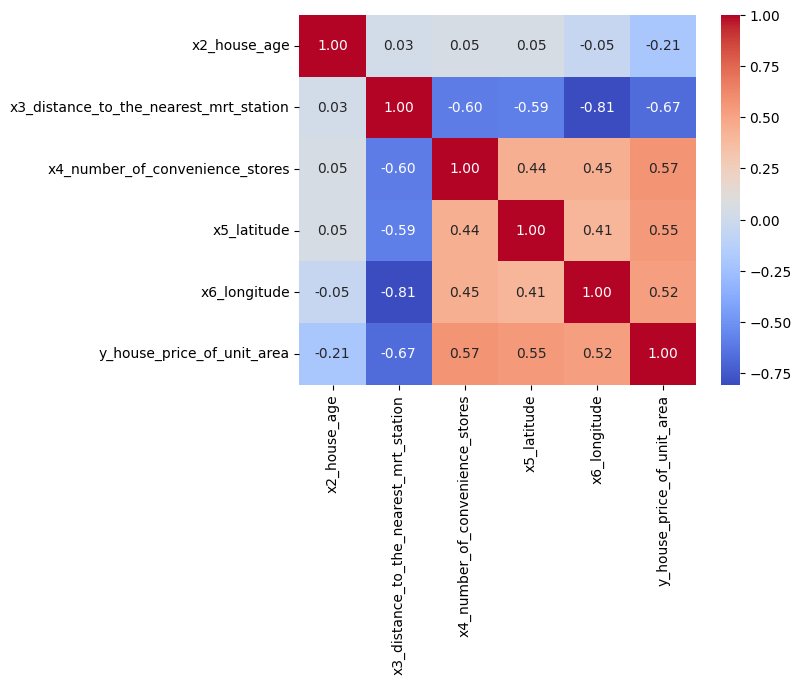

In [43]:
from seaborn import heatmap

heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f')

In [46]:
x_real_estate = real_estate_columns.drop(columns=["y_house_price_of_unit_area"])
y_real_estate = real_estate_columns["y_house_price_of_unit_area"]

x_real_estate_const = sm.add_constant(x_real_estate)
model_real_estate = sm.OLS(y_real_estate, x_real_estate_const).fit()
print(model_real_estate.summary())

                                OLS Regression Results                                
Dep. Variable:     y_house_price_of_unit_area   R-squared:                       0.571
Model:                                    OLS   Adj. R-squared:                  0.566
Method:                         Least Squares   F-statistic:                     108.7
Date:                     niedz., 01 cze 2025   Prob (F-statistic):           9.34e-73
Time:                                11:05:28   Log-Likelihood:                -1492.4
No. Observations:                         414   AIC:                             2997.
Df Residuals:                             408   BIC:                             3021.
Df Model:                                   5                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

Wyraz wolny = -4945 dolarów - interpretacja nie ma sensu ekonomicznego.
x2 = -0,27 - wraz ze wzrostem wieku domu o 1 rok, cena za metr spada średnio o 0,27 dolarów, ceteris paribus - przy pozostałych cechach nie zmienionych.
x3 = -0,0043 - wraz ze wzrostem odległości do najbliżej stacji metra o 1 metr, cena za metr spada średnio o 0,0043 dolarów.
x4 = 1,16 - wraz ze wzrostem liczby sklepów w okolicy o 1, cena za metr wzrasta średnio o 1,16 dolarów.
x5 = 237,77 - wraz ze wzrostem szerokości geograficznej o 1 stopień, cena za metr wzrasta średnio o 237,77 dolarów.
x6 = -7,8 - wraz ze wzrostem długości geograficznej o 1 stopień, cena za metr spada średnio o 7,8 dolarów.

Usunięcie zmiennych o niskiej istotności statystycznej:

In [47]:
x_real_estate = real_estate_columns.drop(columns=["y_house_price_of_unit_area", "x6_longitude"])
y_real_estate = real_estate_columns["y_house_price_of_unit_area"]

x_real_estate_const = sm.add_constant(x_real_estate)
model_real_estate = sm.OLS(y_real_estate, x_real_estate_const).fit()
print(model_real_estate.summary())

                                OLS Regression Results                                
Dep. Variable:     y_house_price_of_unit_area   R-squared:                       0.571
Model:                                    OLS   Adj. R-squared:                  0.567
Method:                         Least Squares   F-statistic:                     136.2
Date:                     niedz., 01 cze 2025   Prob (F-statistic):           7.60e-74
Time:                                11:19:17   Log-Likelihood:                -1492.5
No. Observations:                         414   AIC:                             2995.
Df Residuals:                             409   BIC:                             3015.
Df Model:                                   4                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

Analiza normalności reszt

In [59]:
residuals = model_real_estate.resid
residuals

0     -10.619732
1      -6.958260
2       0.501993
3       8.001993
4      -4.713489
         ...    
409     0.185563
410    -2.361652
411    -5.799643
412     7.340446
413    11.780195
Length: 414, dtype: float64

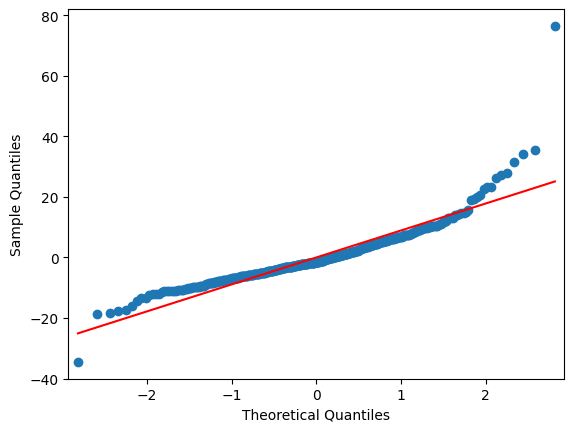

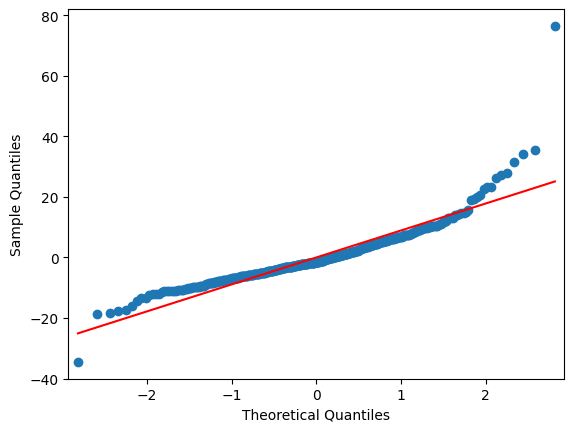

In [61]:
sm.qqplot(residuals, line='s')

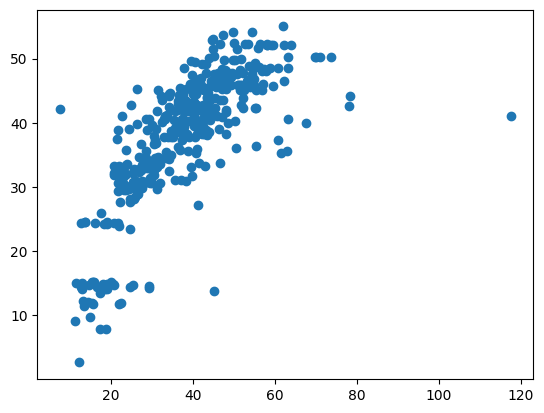

In [62]:
pred = model_real_estate.predict(x_real_estate_const)
plt.scatter(y_real_estate, pred)

Wartości odstające

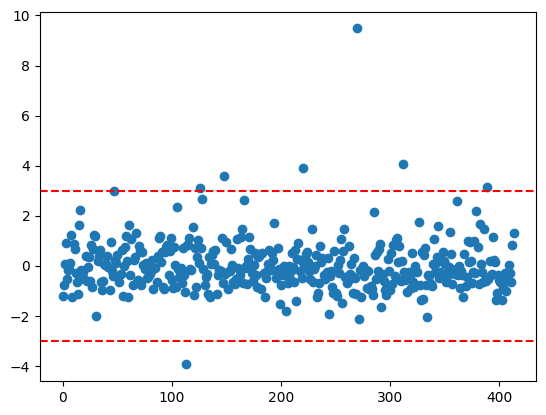

In [66]:
influence = model_real_estate.get_influence()

residuals_studentized = influence.resid_studentized_external

plt.scatter(range(len(residuals_studentized)), residuals_studentized)
plt.axhline(y=3, color='r', linestyle='--')
plt.axhline(y=-3, color='r', linestyle='--')

outliers_resid = residuals_studentized[np.abs(residuals_studentized) > 3]


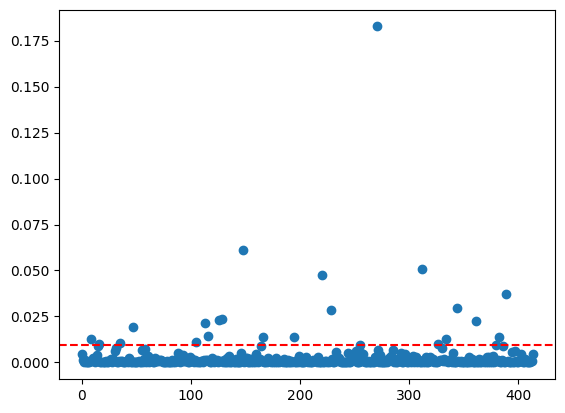

In [71]:
cooks_d = influence.cooks_distance[0]
threshold = 4 / len(cooks_d)

plt.scatter(range(len(cooks_d)), cooks_d)
plt.axhline(y=threshold, color='r', linestyle='--')

outliers_cooks = cooks_d[cooks_d > threshold]

In [73]:
indices_outliers_cooks = np.where(cooks_d > threshold)[0]
indices_outliers_resid = np.where(np.abs(residuals_studentized) > 3)[0]
print("Outliers based on Cook's distance:", indices_outliers_cooks)
print("Outliers based on Studentized residuals:", indices_outliers_resid)

Outliers based on Cook's distance: [  8  16  35  47 105 113 116 126 128 148 166 194 220 228 255 270 312 326
 334 344 361 379 382 389]
Outliers based on Studentized residuals: [113 126 148 220 270 312 389]


In [75]:
x_real_estate_no_outliers = x_real_estate.drop(index=indices_outliers_cooks)
y_real_estate_no_outliers = y_real_estate.drop(index=indices_outliers_cooks)

x_real_estate_no_outliers_const = sm.add_constant(x_real_estate_no_outliers)
model_real_estate = sm.OLS(y_real_estate_no_outliers, x_real_estate_no_outliers_const).fit()
print(model_real_estate.summary())

                                OLS Regression Results                                
Dep. Variable:     y_house_price_of_unit_area   R-squared:                       0.729
Model:                                    OLS   Adj. R-squared:                  0.727
Method:                         Least Squares   F-statistic:                     259.5
Date:                     niedz., 01 cze 2025   Prob (F-statistic):          7.07e-108
Time:                                11:57:12   Log-Likelihood:                -1265.0
No. Observations:                         390   AIC:                             2540.
Df Residuals:                             385   BIC:                             2560.
Df Model:                                   4                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

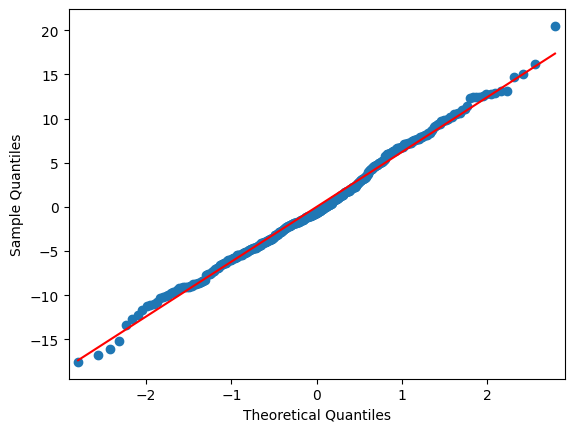

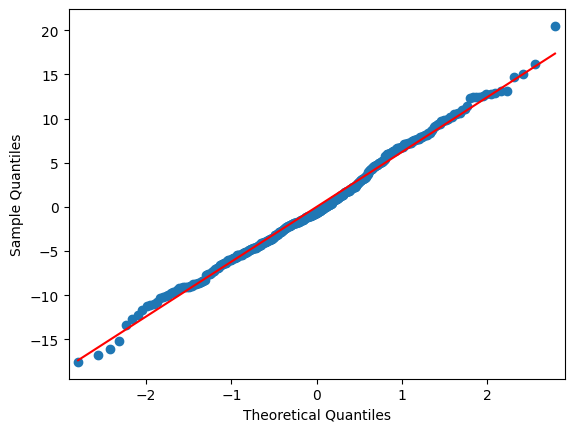

In [76]:
residuals = model_real_estate.resid
sm.qqplot(residuals, line='s')

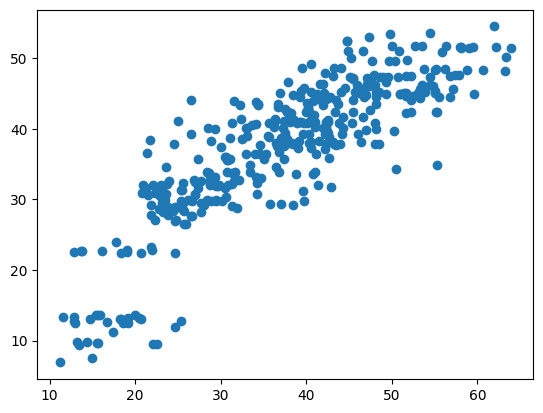

In [81]:
pred = model_real_estate.predict(x_real_estate_no_outliers_const)
plt.scatter(y_real_estate_no_outliers, pred)

In [84]:
print("MAE:", mean_absolute_error(y_real_estate_no_outliers, pred))
print("RMSE:", np.sqrt(mean_squared_error(y_real_estate_no_outliers, pred)))
print("MAPE:", mean_absolute_percentage_error(y_real_estate_no_outliers, pred))

MAE: 4.973408997555179
RMSE: 6.201321644167552
MAPE: 0.15379020703571813


# Drzewo decyzyjne

In [94]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

tree_model = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_model.fit(x_real_estate_no_outliers, y_real_estate_no_outliers)

DecisionTreeRegressor(max_depth=3, random_state=42)

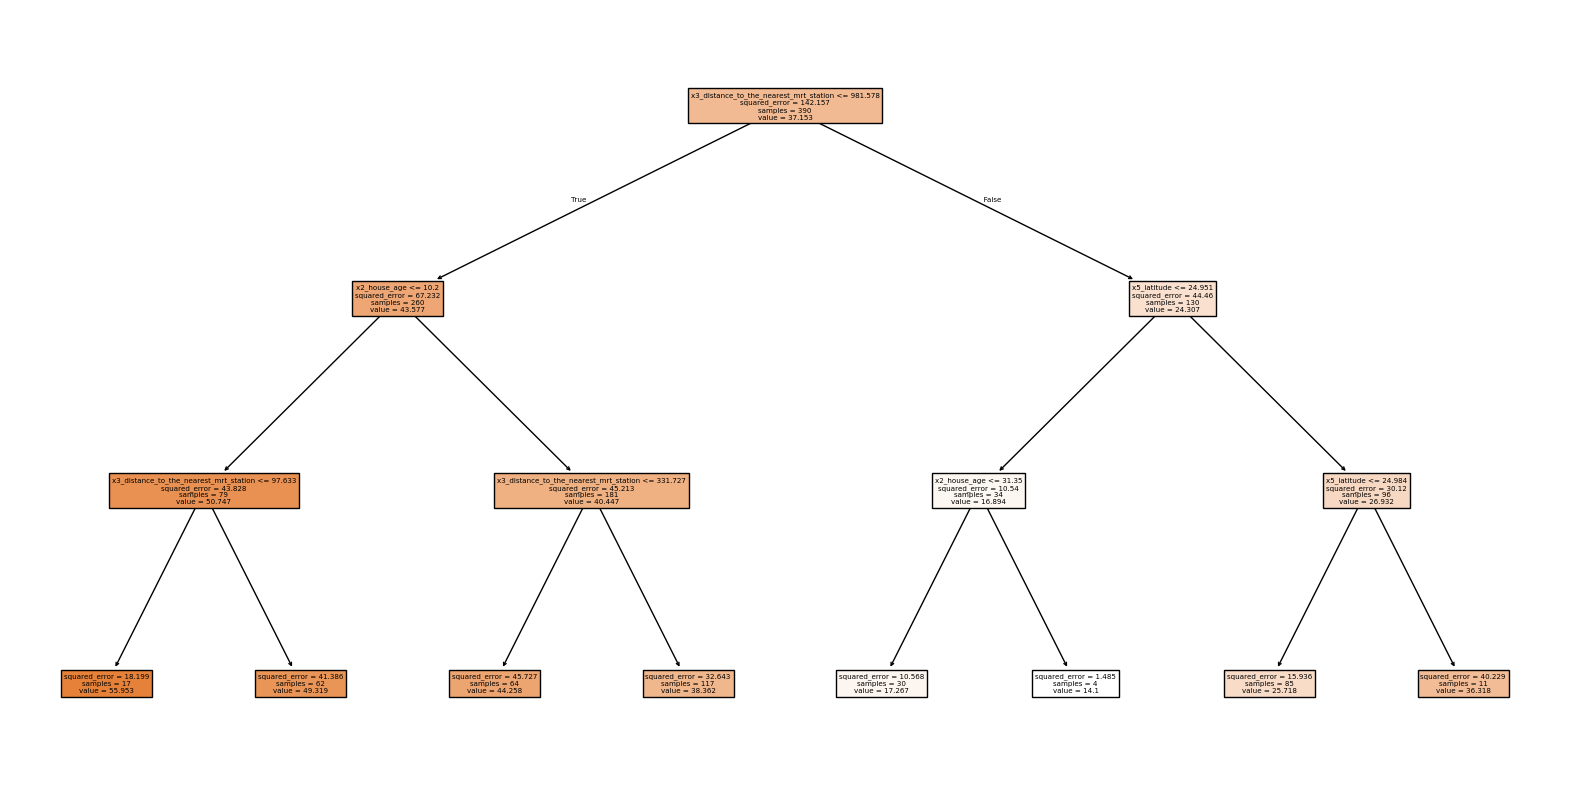

In [95]:
plt.figure(figsize=(20,10))
plot_tree(tree_model, feature_names=x_real_estate_no_outliers.columns, filled=True)
plt.show()

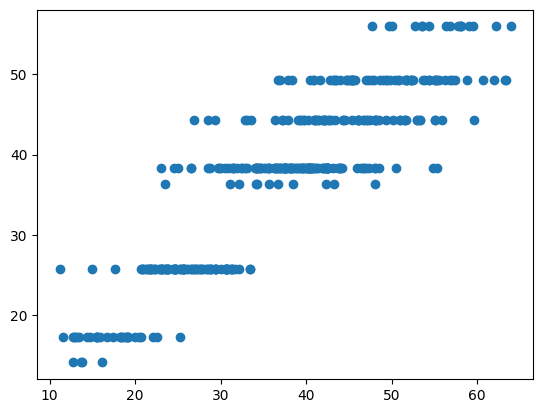

In [96]:
y_pred_tree = tree_model.predict(x_real_estate_no_outliers)
plt.scatter(y_real_estate_no_outliers, y_pred_tree)

In [97]:
print("MAE:", mean_absolute_error(y_real_estate_no_outliers, y_pred_tree))
print("RMSE:", np.sqrt(mean_squared_error(y_real_estate_no_outliers, y_pred_tree)))
print("MAPE:", mean_absolute_percentage_error(y_real_estate_no_outliers, y_pred_tree))

MAE: 4.237619323602073
RMSE: 5.4868225148085825
MAPE: 0.12482371681467096


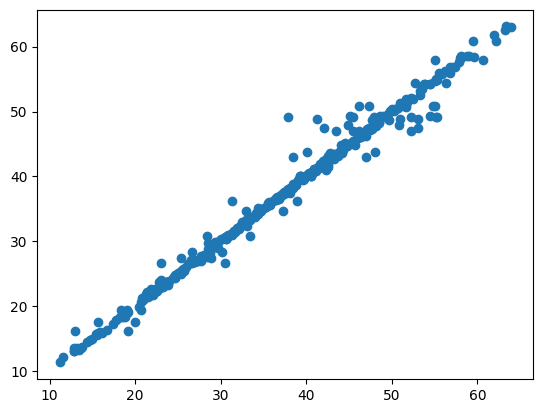

In [99]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(x_real_estate_no_outliers, y_real_estate_no_outliers)
y_pred_xgb = xgb_model.predict(x_real_estate_no_outliers)
plt.scatter(y_real_estate_no_outliers, y_pred_xgb)

In [100]:
print("MAE:", mean_absolute_error(y_real_estate_no_outliers, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_real_estate_no_outliers, y_pred_xgb)))
print("MAPE:", mean_absolute_percentage_error(y_real_estate_no_outliers, y_pred_xgb))

MAE: 0.6578609251364683
RMSE: 1.430978339218984
MAPE: 0.018179385142902807


# Zadanie

In [107]:
insurance = pd.read_csv("data/insurance.csv")

insurance_one_hot = pd.get_dummies(insurance[["sex", "smoker", "region"]], drop_first=True, dtype=int)

insurance_encoded = pd.concat([insurance.drop(columns=["sex", "smoker", "region"]), insurance_one_hot], axis=1)
x_insurance = insurance_encoded.drop(columns=["charges"])
y_insurance = insurance_encoded["charges"]

In [108]:
x_insurance_const = sm.add_constant(x_insurance)
model_insurance = sm.OLS(y_insurance, x_insurance_const).fit()
print(model_insurance.summary())

                             OLS Regression Results                            
Dep. Variable:                 charges   R-squared:                       0.751
Model:                             OLS   Adj. R-squared:                  0.749
Method:                  Least Squares   F-statistic:                     500.8
Date:              niedz., 01 cze 2025   Prob (F-statistic):               0.00
Time:                         12:25:34   Log-Likelihood:                -13548.
No. Observations:                 1338   AIC:                         2.711e+04
Df Residuals:                     1329   BIC:                         2.716e+04
Df Model:                            8                                         
Covariance Type:             nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.194e+04   